In [1]:
from sympy import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
H_s, H_jw, mod_H_jw, phi, s, k, t, c, r, rl, Hs, w = symbols("H_s H_jw |H_jw| phi s k t c r rl Hs w")


In [3]:
Hs = (1/(s*r*c + 1))
Hs


1/(c*r*s + 1)

In [4]:
Hs_subs = Hs.subs({c:100e-9, r: 33e3, rl: 22e3}).simplify()
Hs_subs

1/(0.0033*s + 1)

In [5]:
# Substituindo s = jw

Hjw = Hs.subs(s, I*w)
Eq(H_jw,Hjw)

Eq(H_jw, 1/(I*c*r*w + 1))

In [6]:
Eq(H_jw,Hjw).subs({c:100e-9, r: 33e3, rl: 22e3})

Eq(H_jw, 1/(0.0033*I*w + 1))

In [7]:
#Calculando Modulo
mod_Hjw = Eq(mod_H_jw,abs(Hjw))
mod_Hjw

Eq(|H_jw|, 1/Abs(I*c*r*w + 1))

In [8]:
#resposta em radiano, se liga
Eq(phi,deg(arg(Hjw)))

Eq(phi, 180*arg(1/(I*c*r*w + 1))/pi)

In [9]:

mod_Hjw_subs = mod_Hjw.subs({c:100e-9, r: 33e3, rl: 22e3})
mod_Hjw_subs


Eq(|H_jw|, 1/Abs(0.0033*I*w + 1))

In [10]:
mod_H_zero = mod_Hjw_subs.subs(w,0)
mod_H_zero

Eq(|H_jw|, 1)

In [11]:
float((10)/(sqrt(2)))

7.0710678118654755

In [12]:
Hjw_subs = Hjw.subs({c:100e-9, r: 33e3})
Hjw_denom = denom(Hjw_subs)
Hjw_polos = solve(Hjw_denom, w)
Hjw_polos
Eq(H_jw,Hjw_subs)

Eq(H_jw, 1/(0.0033*I*w + 1))

In [13]:
Hjw_polos

[303.030303030303*I]

In [14]:
#resposta em radiano, se liga
Fase = Eq(phi,deg(arg(Hjw_subs)))
Fase

Eq(phi, 180*arg(1/(0.0033*I*w + 1))/pi)

In [15]:
#freq 40Hz
Mod1=abs(Hjw_subs)
Arg1=deg(arg(Hjw_subs))
float(Mod1.subs(w,2*pi*50)), float(Arg1.subs(w,2*pi*50))

(0.6942436063344006, -46.03302698221118)

In [16]:
# calcular o módulo e o argumento em cada frequência

def calcular_respostas(frequencias, Yo, Uo, cursor_diff_2_1):
    resultados = []
    for i, freq in enumerate(frequencias):  # Usando enumerate para indexar corretamente
        omega = 2 * pi * freq
        Mod = abs(Hjw_subs)
        Arg = deg(arg(Hjw_subs))
        Mod_value = float(Mod.subs(w, omega))
        Arg_value = float(Arg.subs(w, omega))
        Periodo = 1 / freq
        Mod_Hjw = Yo[i] / Uo[i] 
        Phase = 360*cursor_diff_2_1[i]/Periodo

        resultados.append({
            'Frequência (Hz)': freq,
            'Módulo_Python': Mod_value,
            'Argumento_Python (Deg)': Arg_value,
            'Período (s)': Periodo,
            'Yo': Yo[i],
            'Uo': Uo[i],
            '|H(jω)| LTSpice': abs(Mod_Hjw),
            "Fase LTSpice (Deg)": Phase
        })

    return resultados

# Lista de frequencias em Hz
# frequencias = [0.01, 0.1, 1, 10, 100, 1000]
frequencias = np.logspace(-2, 5, num=100)
Yo = np.logspace(-2, 5, num=100)
Uo = np.logspace(-2, 5, num=100)
cursor_diff_2_1 = np.logspace(-2, 5, num=100)

resultados = calcular_respostas(frequencias, Yo, Uo, cursor_diff_2_1)
df = pd.DataFrame(resultados)
df

,Frequência (Hz),Módulo_Python,Argumento_Python (Deg),Período (s),Yo,Uo,|H(jω)| LTSpice,Fase LTSpice (Deg)
0,0.010000,1.000000,-0.011880,100.000000,0.010000,0.010000,1.0,3.600000e-02
1,0.011768,1.000000,-0.013981,84.975344,0.011768,0.011768,1.0,4.985591e-02
2,0.013849,1.000000,-0.016452,72.208090,0.013849,0.013849,1.0,6.904477e-02
3,0.016298,1.000000,-0.019361,61.359073,0.016298,0.016298,1.0,9.561916e-02
4,0.019179,1.000000,-0.022785,52.140083,0.019179,0.019179,1.0,1.324217e-01
...,...,...,...,...,...,...,...,...
95,52140.082880,0.000925,-89.947002,0.000019,52140.082880,52140.082880,1.0,9.786918e+11
96,61359.072734,0.000786,-89.954965,0.000016,61359.072734,61359.072734,1.0,1.355377e+12
97,72208.090184,0.000668,-89.961731,0.000014,72208.090184,72208.090184,1.0,1.877043e+12
98,84975.343591,0.000568,-89.967481,0.000012,84975.343591,84975.343591,1.0,2.599491e+12


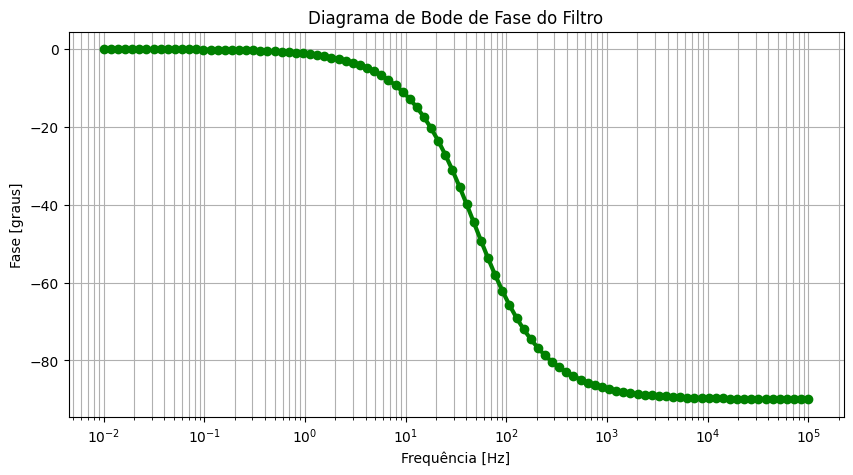

In [20]:
# Convertendo módulo para dB 
df['Módulo_Python'] = 20 * np.log10(df['Módulo_Python'])


# Fase em graus
plt.figure(figsize=(10, 5))
plt.semilogx(df['Frequência (Hz)'], df['Argumento_Python (Deg)'], marker='o', linestyle='-',linewidth=3, color='green')
plt.title('Diagrama de Bode de Fase do Filtro')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Fase [graus]')
plt.grid(True, which="both", ls="-")
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


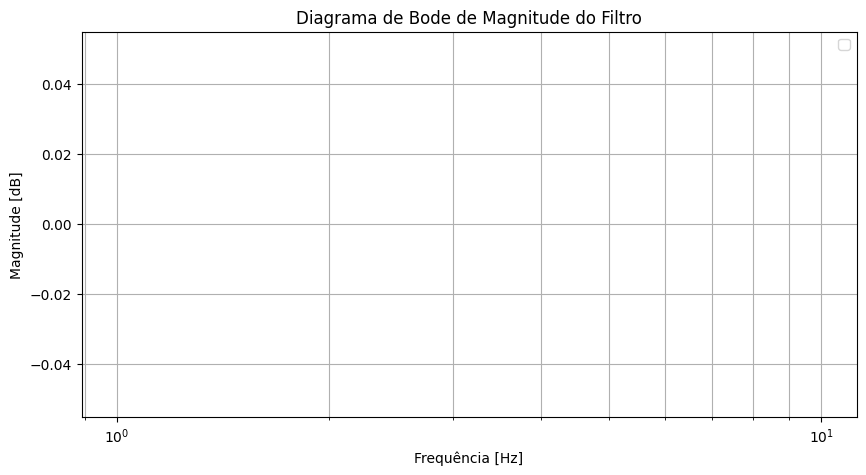

In [22]:

# Módulo em dB
plt.figure(figsize=(10, 5))
plt.semilogx(df['Frequência (Hz)'], df['Módulo_Python'], marker='o', linestyle='-',linewidth=3, color='blue')
plt.title('Diagrama de Bode de Magnitude do Filtro')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid(True, which="both", ls="-")
plt.legend()
plt.show()


In [ ]:
# Convertendo módulo para dB
df['Módulo_Python'] = 20 * np.log10(df['Módulo_Python'])

# Plotando o diagrama de Bode
fig, ax1 = plt.subplots(figsize=(10, 5))

# Módulo em dB
ax1.semilogx(df['Frequência (Hz)'], df['Módulo_Python'], marker='o', linestyle='-', label='Módulo (dB)')
ax1.set_xlabel('Frequência (Hz)')
ax1.set_ylabel('Magnitude (dB)')
ax1.grid(True, which="both", ls="-")
ax1.legend(loc='upper right')

# Fase em graus
ax2 = ax1.twinx()
ax2.semilogx(df['Frequência (Hz)'], df['Argumento_Python (Deg)'], marker='o', linestyle='-', color='orange', label='Fase (Deg)')
ax2.set_ylabel('Fase (Deg)')
ax2.legend(loc='lower right')

plt.title('Diagrama de Bode')
plt.grid(True, which="both", ls="-")
plt.show()

In [ ]:
10 * np.log10(df['Módulo_Python'])

In [ ]:
Hs_sub_deg = Hs_subs*0.8*(1/s)

Hs_sub_deg

In [ ]:
#Transformada inversa de Laplace
vt = inverse_laplace_transform(Hs_sub_deg, s, t)
vt

In [ ]:
Eq(H_s, Hs_subs)

In [ ]:
# Realizando a transformação inversa de Laplace
vt = inverse_laplace_transform(Hs_sub_deg, s, t)

# Convertendo a expressão simbólica para uma função numérica
v_t_func = lambdify(t, vt, 'numpy')

# Definindo o vetor de tempo de 0 a 5 segundos
t_vals = np.linspace(0, 5, 500)
v_t_vals = v_t_func(t_vals)

# Plotando a resposta ao degrau
plt.figure(figsize=(10, 6))
plt.plot(t_vals, v_t_vals, label='Resposta ao Degrau')
plt.title('Resposta ao Degrau para 0 ≤ t ≤ 5s')
plt.xlabel('Tempo (s)')
plt.ylabel('v(t)')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:

# Determinando o valor de regime permanente
lam_Vo_t = lambdify(t, vt)
t_vals= np.linspace(0,0.5, 1000)
Vo_vals= lam_Vo_t(t_vals)


In [ ]:
valor_regime_permanente = vt.subs(t,2)
valor_regime_permanente

In [ ]:
t_10 = t_vals[np.where(np.isclose(-8*0.1, Vo_vals, atol=1e-1))][1]
t_90 = t_vals[np.where(np.isclose(-8*0.9, Vo_vals, atol=1e-2))][1]

t_10,t_90

In [ ]:
vt_10 = vt.subs(t,t_10)
vt_90 = vt.subs(t,t_90)

vt_10, vt_90